<a href="https://www.kaggle.com/code/rohithayarlagadda/retail-customer-data-segmentation?scriptVersionId=92423167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ii-uci/online_retail_II.csv


In [2]:
import datetime as dt           # date time libraries
from datetime import timedelta
import seaborn as sns           # Easy with default themes, helpful for statistics
import matplotlib.pyplot as plt # Basic plotting, highly customizable, suits pandas greatly
import squarify

# PREPARE PHASE

**Steps:**
* Preparing/Importing Data
* Add dimensions or features from existing columns

**Objectives:**
* Combine Data from sources

In [3]:
# Loading dataset
full_df = pd.read_csv('/kaggle/input/online-retail-ii-uci/online_retail_II.csv')
# Preview data
full_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# CLEAN & PROCESS PHASE

**Steps:** 
* Data Cleaning
>* Ensure Consistent Data 
* Data Manipulation
>* Identify errors or inaccuracies, includes missing data
>* Handling errors or inaccuracies

**Objectives:**

* Eliminate Errors, inaccuracies


* What is the size of the entire data
* What are the feature names - Are they readable? Do you want to change them?
* Are the datatypes reasonable for the features?
* What are categorical and What are numerical features
* Know, what are usual/unusual/impossible values for a feature
* Are there missing/null values in features
* Is handling missing values important?
* Should we keep them as null itself ? Just Drop them ? Replace with Best Estimate? 
* How to deal with missing/null values in categorical features
* How to deal with missing/null values in numerical features
* Preview Data - Any Alphanumerical values ?

In [4]:
print("Dataset Information :", full_df.info(), end= '\n\n')
print("Sum of null values :", full_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
Dataset Information : None

Sum of null values : Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [5]:
# 3. Select categorical columns
categorical_cols = [cname for cname in full_df.columns if
                    full_df[cname].dtype == "object"]
categorical_df = full_df[categorical_cols]

# 4. Select numerical columns
numerical_cols = [cname for cname in full_df.columns if 
                full_df[cname].dtype in ['int64', 'float64']]
numerical_df = full_df[numerical_cols]

In [6]:
print("Shape:", full_df.shape, end='\n\n')
print("Features:", full_df.columns.values, end='\n\n')

print("Categorical Features:", categorical_cols, end='\n\n')
print("Numerical Features:", numerical_cols, end='\n\n')

Shape: (1067371, 8)

Features: ['Invoice' 'StockCode' 'Description' 'Quantity' 'InvoiceDate' 'Price'
 'Customer ID' 'Country']

Categorical Features: ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']

Numerical Features: ['Quantity', 'Price', 'Customer ID']



**Identify errors or inaccuracies**
* But, what about existing data? Is that practical?
* Say, Quantity and Price can't be negative.
* We can verify if Country names are valid.
* Exclude Cancelled Invoice 
* Include Cost per order Column - Quantity * Price

Percentage of Incorrect Quantity values:  10.0 %



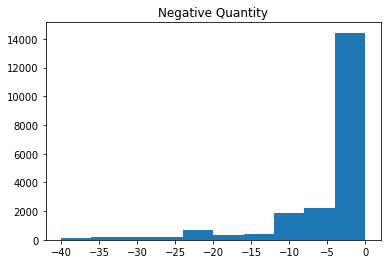

TPercentage of Incorrect Price values:  3.0 %



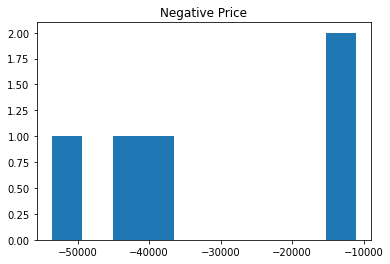

Total Unique Countires: ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'European Community']

Frequency of Invalid Countries: Unspecified    756
Name: Country, dtype: int64



<AxesSubplot:>

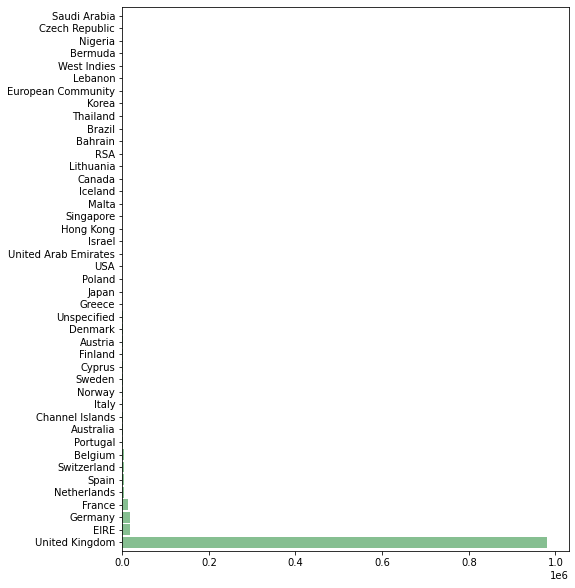

In [7]:
# Plotting a Histogram for Negative Quantity Range - to understand the spread
Negative_Quantity= full_df[full_df['Quantity']<0].Quantity
Sum_Total_Quantity= full_df['Quantity'].sum()
Percentage_Incorrect_Quantity= round((abs(Negative_Quantity.sum())/Sum_Total_Quantity), 2)*100
print("Percentage of Incorrect Quantity values: ",Percentage_Incorrect_Quantity, "%", end='\n\n')
plt.hist(Negative_Quantity, range= (-40, 0))
plt.title('Negative Quantity')
plt.show()

# Plotting a Histogram for Negative Price Range - to understand the spread
Negative_Price = full_df[full_df['Price']<0].Price
Sum_Total_Price= full_df['Price'].sum()
Percentage_Incorrect_Price= round((abs(Negative_Price.sum())/Sum_Total_Price), 2)*100
print("TPercentage of Incorrect Price values: ", Percentage_Incorrect_Price, "%", end='\n\n')
plt.hist(Negative_Price)
plt.title('Negative Price')
plt.show()

# Printing unique Countries in the list - to skim through for Invalid names
Country_Names = full_df['Country'].unique()
print("Total Unique Countires:", Country_Names, end='\n\n')

# Know the count of those Invalid Country names
Invalid_count = full_df[full_df['Country'].isin(['Unspecified'])].Country.value_counts()
print("Frequency of Invalid Countries:", Invalid_count, end='\n\n')

# Overall, where do they stand ? - Univariate Analysis
Countries = full_df['Country'].value_counts()
Countries.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

**Handling Errors and Inaccuracies**

1. Negative Quantity and Price need correction. For now, let's remove them and have our data clean.
> Note: Incorrect Quantity values takes up 10%, better to fill them. 
2. Unspecified doesn't look a country name. "ERIE is an island" - I discovered newly!
> Note: Nearly neglibile presence of this invalid country, let's ignore, for now.
3. How to take care of Missing values ? 
> Description, Customer ID
4. How to handle Invalid values ?
> Quantity, Price, Country Name

Note: Adding inplace=True allows us to remove these from the original dataframe rather than a copy of it.

In [8]:
# Step. 3: Handling Missing values - Dropping them
full_df.dropna(axis=0, how='any', inplace=True)

# Step. 4: Handling Invalid values - Ignore
full_df = full_df[full_df['Quantity']> 0]
full_df = full_df[full_df['Price']> 0]
print(full_df.info())

# Step. 5: Formatting column names
full_df.columns = ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country']
print(full_df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB
None
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')



**Handling Inconsistency**
* Exclude Cancelled Invoice entries
* Exclude all other countries, but UK, for now

In [9]:
# Excluding Cancelled operations 
full_df = full_df[~full_df["Invoice"].str.contains("C", na=False)]

# Including just United Kingdom, for now
full_df = full_df[full_df["Country"] == "United Kingdom"]

**Add Dimensions**
* Include Cost per order Column - Quantity * Price

In [10]:
# Create snapshot date
snapshot_date = pd.to_datetime(full_df['InvoiceDate']).max() + timedelta(days=1)
print(snapshot_date)

# Including Cost Per Order column
full_df["CostPerOrder"] = full_df["Quantity"] * full_df["Price"]

# Changing datatype of InvoiceDate type
full_df["InvoiceDate"] = pd.to_datetime(full_df["InvoiceDate"])
print(full_df.info())

dg = (full_df
                    .groupby(by = 'CustomerID', as_index=False)
                    .agg(
                            {'InvoiceDate': [lambda date: (snapshot_date - date.min()).days, lambda date:(snapshot_date - date.max()).days]
                             , 'Invoice': lambda num: num.count()
                             , 'Quantity': lambda quant: quant.sum()
                             , 'CostPerOrder': lambda price: price.sum()
                            })
                    
     )

# Change the name of columns
dg.columns= ['CustomerID', 'num_days', 'most_recent_txn', 'num_orders', 'num_units', 'total_revenue']
dg.head()

2011-12-10 12:49:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 725250 entries, 0 to 1067354
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       725250 non-null  object        
 1   StockCode     725250 non-null  object        
 2   Description   725250 non-null  object        
 3   Quantity      725250 non-null  int64         
 4   InvoiceDate   725250 non-null  datetime64[ns]
 5   Price         725250 non-null  float64       
 6   CustomerID    725250 non-null  float64       
 7   Country       725250 non-null  object        
 8   CostPerOrder  725250 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 55.3+ MB
None


,CustomerID,num_days,most_recent_txn,num_orders,num_units,total_revenue
0,12346.0,726,326,34,74285,77556.46
1,12608.0,405,405,16,323,415.79
2,12745.0,574,487,22,467,723.85
3,12746.0,541,541,17,97,254.55
4,12747.0,732,2,257,2758,9276.54


# CLTV Formulae

* Customer Life Time Value

In [11]:
# Average Order Value
dg['avg_order_value']= dg['total_revenue']/dg['num_orders']
print(dg.head())

# Purchase Frequency 
purchase_frequency=sum(dg['num_orders'])/dg.shape[0]

# Repeat Rate
repeat_rate= dg[dg.num_orders > 1].shape[0]/dg.shape[0]

# Churn Rate
churn_rate= 1 - repeat_rate
purchase_frequency,repeat_rate,churn_rate

   CustomerID  num_days  most_recent_txn  num_orders  num_units  \
0     12346.0       726              326          34      74285   
1     12608.0       405              405          16        323   
2     12745.0       574              487          22        467   
3     12746.0       541              541          17         97   
4     12747.0       732                2         257       2758   

   total_revenue  avg_order_value  
0       77556.46      2281.072353  
1         415.79        25.986875  
2         723.85        32.902273  
3         254.55        14.973529  
4        9276.54        36.095486  


(135.5607476635514, 0.9809345794392523, 0.01906542056074767)

In [12]:
# Profit Margin
dg['profit_margin']= dg['total_revenue']*0.25

# Average Customer Value
dg['CLTV']= (dg['avg_order_value']*purchase_frequency)/churn_rate

#Customer Lifetime Value
dg['cust_lifetime_value']= dg['CLTV']*dg['profit_margin']

dg.head()

,CustomerID,num_days,most_recent_txn,num_orders,num_units,total_revenue,avg_order_value,profit_margin,CLTV,cust_lifetime_value
0,12346.0,726,326,34,74285,77556.46,2281.072353,19389.1150,1.621910e+07,3.144739e+11
1,12608.0,405,405,16,323,415.79,25.986875,103.9475,1.847743e+05,1.920683e+07
2,12745.0,574,487,22,467,723.85,32.902273,180.9625,2.339448e+05,4.233524e+07
3,12746.0,541,541,17,97,254.55,14.973529,63.6375,1.064662e+05,6.775243e+06
4,12747.0,732,2,257,2758,9276.54,36.095486,2319.1350,2.566495e+05,5.952049e+08


# Customer Segmentation - RFM
* Segment customers using RFM
* Recency : last time customer made a purchase, more likely to repeat than a old customer
* Frequency : how many times a customer made a purchase, who purchases often is likely to come back
* Monetary Value : amount of money a customer has spent within that timeframe, large purchases likely to return than a customer who spends less

> So, what metrics do we need ?
1. the date of their most recent transaction 
2. the number of transactions they’ve made within a consistent time frame (a year will work best)
3. the total amount they’ve spent during that same timeframe.

* most_recent_txn -> recency; num_orders -> frequency; total_revenue -> monetary value

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

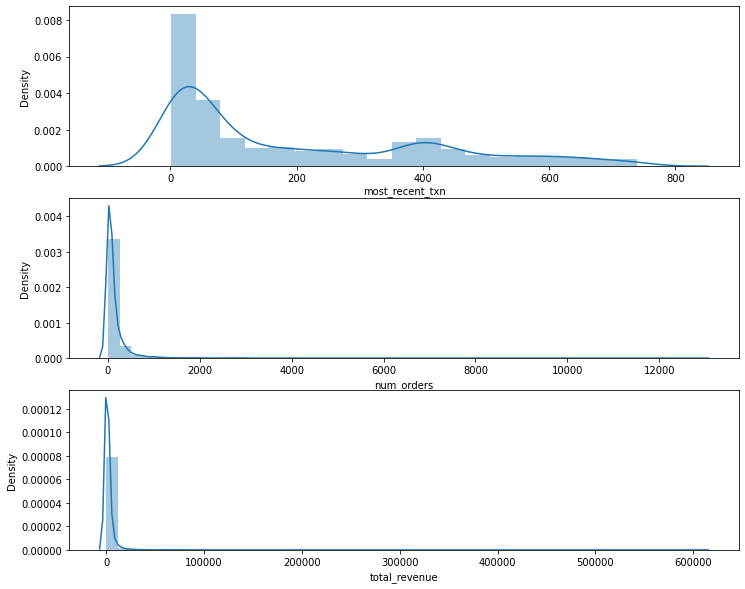

In [13]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(dg['most_recent_txn'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(dg['num_orders'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(dg['total_revenue'])
# Show the plot
plt.show()

# Setting skewed Probability Distribution right!
* Data is very skewed, let us group these values into quantiles
* Cut points dividing the range of a probability distribution into continuous intervals with equal probabilities, or dividing the observations in a sample in the same way

# RFM Calculation
111 - Highly engaged customers who have bought the most recent, the most often, and generated the most revenue

In [14]:
# --Calculate R, F, M groups--

# Create labels 
r_labels = range(1, 5)         # Recency
f_labels = range(4, 0, -1)     # Frequency
m_labels = range(4, 0, -1)     # Monetary Value

# Discretize most recent transaction based on quantiles, and return a series of integers - index and values
r_groups = pd.qcut(dg['most_recent_txn'], q= 4, labels = r_labels)
# Assign these labels to five equal percentile groups 
f_groups = pd.qcut(dg['num_orders'], q= 4, labels = f_labels)
# Assign these labels to five equal percentile groups 
m_groups = pd.qcut(dg['total_revenue'], q= 4, labels = m_labels)

# Assigning newly created columns to data frame
dg = dg.assign(R= r_groups.values, F= f_groups.values, M= m_groups.values)

dg.rename({'most_recent_txn': 'recency', 'num_orders': 'frequency', 'total_revenue': 'monetary'}, axis=1, inplace=True)
print(dg.dtypes)

CustomerID              float64
num_days                  int64
recency                   int64
frequency                 int64
num_units                 int64
monetary                float64
avg_order_value         float64
profit_margin           float64
CLTV                    float64
cust_lifetime_value     float64
R                      category
F                      category
M                      category
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5350 entries, 0 to 5349
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerID           5350 non-null   float64 
 1   num_days             5350 non-null   int64   
 2   recency              5350 non-null   int64   
 3   frequency            5350 non-null   int64   
 4   num_units            5350 non-null   int64   
 5   monetary             5350 non-null   float64 
 6   avg_order_value      5350 non-null   float64 
 7   profit_margin        5350 non-null   float64 
 8   CLTV                 5350 non-null   float64 
 9   cust_lifetime_value  5350 non-null   float64 
 10  R                    5350 non-null   category
 11  F                    5350 non-null   category
 12  M                    5350 non-null   category
dtypes: category(3), float64(6), int64(4)
memory usage: 434.1 KB
None


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

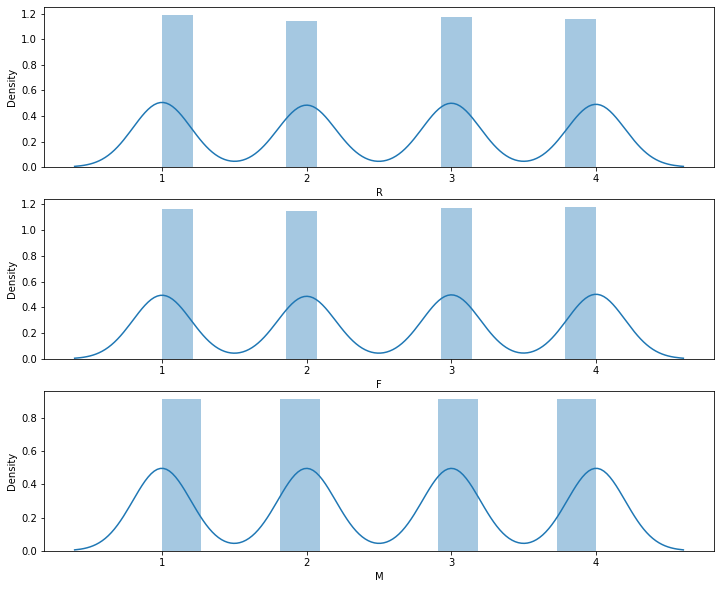

In [15]:

print(dg.info())
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(dg['R'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(dg['F'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(dg['M'])
# Show the plot
plt.show()

In [16]:
# Concat RFM quantile values to create RFM Segments
def join_rfm(df): 
    strs = [str(df['R']), str(df['F']), str(df['M']) ]
    return ''.join(strs)

dg['RFM_segment'] = dg.apply(join_rfm, axis= 1)
print(dg.head())

   CustomerID  num_days  recency  frequency  num_units  monetary  \
0     12346.0       726      326         34      74285  77556.46   
1     12608.0       405      405         16        323    415.79   
2     12745.0       574      487         22        467    723.85   
3     12746.0       541      541         17         97    254.55   
4     12747.0       732        2        257       2758   9276.54   

   avg_order_value  profit_margin          CLTV  cust_lifetime_value  R  F  M  \
0      2281.072353     19389.1150  1.621910e+07         3.144739e+11  3  3  1   
1        25.986875       103.9475  1.847743e+05         1.920683e+07  4  4  3   
2        32.902273       180.9625  2.339448e+05         4.233524e+07  4  3  3   
3        14.973529        63.6375  1.064662e+05         6.775243e+06  4  4  4   
4        36.095486      2319.1350  2.566495e+05         5.952049e+08  1  1  1   

  RFM_segment  
0   3.03.01.0  
1   4.04.03.0  
2   4.03.03.0  
3   4.04.04.0  
4   1.01.01.0  


# Unique Customer Segments

**111: Core or Best Customers** : Focus on loyalty programs and new product introductions. 
Proven to have a higher willingness to pay, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through **product recommendations based on previous purchases**

**X1X: Loyal Customers** : Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with **Free Shipping** or other like benefits.

**XX1: Whales or Highest Paying Customers** : These customers have demonstrated a high willingness to pay. Consider **premium offers, subscription tiers, luxury products, or value add cross/up-sells** to increase AOV. Don't waste margin on discounts

**X13 OR X14: Promising - Faithful customers** : You've already succeeded in creating loyalty. Focus on increasing monetization through **product recommendations based on past purchases and incentives tied to spending thresholds** (pegged to your store AOV).

**14X: Rookies - Your Newest Customers** : Most customers never graduate to loyal. Having clear strategies in place for first time buyers such as **triggered welcome emails** will pay dividends.

**44X: Slipping - Once Loyal, Now Gone** : Customers leave for a variety of reasons. Depending on your **situation price deals, new product launches, or other retention strategies**.


60


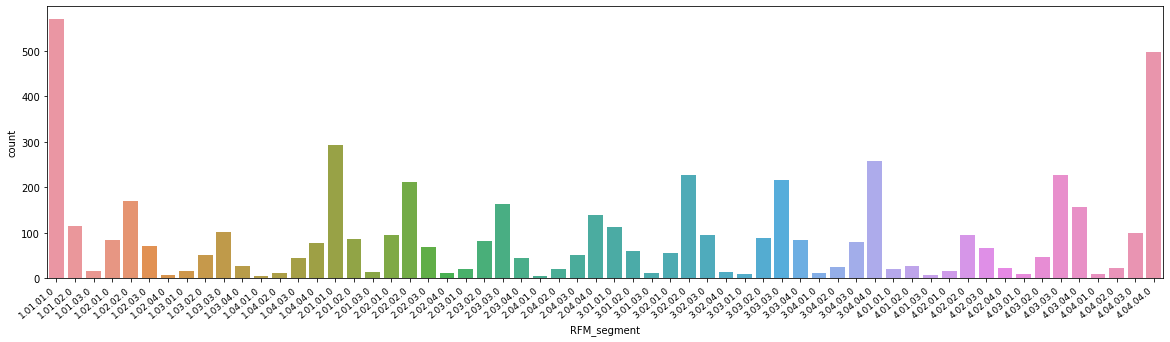

In [17]:
# Count num of unique segments
rfm_count_unique = dg['RFM_segment'].nunique() 
print(rfm_count_unique)

rfm_seg_order = dg['RFM_segment'].value_counts().sort_index().index

plt.figure(figsize=(20,5))
sns.set_palette("Set2")
ax= sns.countplot(data= dg, x='RFM_segment', dodge= False, order= rfm_seg_order) 
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [18]:
def user_segment(dg):
    X = [1, 2, 3, 4]
    if dg['RFM_segment'] == '111':
        return 'Core'
    elif ((dg['F'] == 1) & (dg['R'] >= 1) & (dg['M'] >= 1)) & (dg['RFM_segment'] != '111'):
        return 'Loyal'
    elif ((dg['M'] == 1) & (dg['R'] >= 1) & (dg['F'] >= 1)) & (dg['RFM_segment'] != '111'):
        return 'Whales'
    elif (dg['F'] == 1) & (dg['M'] == 3 | dg['M'] == 4) & (dg['R'] >= 1):
        return 'Promising'
    elif (dg['R'] == 1) & (dg['F'] == 4) & (dg['M'] >= 1):
        return 'Rookies'
    elif (dg['R'] == 4) & (dg['F'] == 4) & (dg['M'] >= 1):
        return 'Slipping'
    else:
        return 'NA'
    
dg['user_segment']= dg.apply(user_segment, axis= 1)
dg.head()

,CustomerID,num_days,recency,frequency,num_units,monetary,avg_order_value,profit_margin,CLTV,cust_lifetime_value,R,F,M,RFM_segment,user_segment
0,12346.0,726,326,34,74285,77556.46,2281.072353,19389.1150,1.621910e+07,3.144739e+11,3,3,1,3.03.01.0,Whales
1,12608.0,405,405,16,323,415.79,25.986875,103.9475,1.847743e+05,1.920683e+07,4,4,3,4.04.03.0,Slipping
2,12745.0,574,487,22,467,723.85,32.902273,180.9625,2.339448e+05,4.233524e+07,4,3,3,4.03.03.0,NA
3,12746.0,541,541,17,97,254.55,14.973529,63.6375,1.064662e+05,6.775243e+06,4,4,4,4.04.04.0,Slipping
4,12747.0,732,2,257,2758,9276.54,36.095486,2319.1350,2.566495e+05,5.952049e+08,1,1,1,1.01.01.0,Loyal


In [19]:
# Calculate average values for each user segment, and return a size of each segment 
user_segment_size = (
                    dg.
                        groupby('user_segment')
                        .agg({
                                'CustomerID': 'count',
                                'recency': 'mean',
                                'frequency': 'mean',
                                'monetary': ['mean', 'count']
                        }).round(1)
                )
# Print the aggregated dataset
user_segment_size.head()

CustomerID recency frequency monetary      
                  count    mean      mean     mean count
user_segment                                            
Loyal              1336    69.1     409.5   7763.5  1336
NA                 2922   210.6      48.3    747.0  2922
Rookies             132    15.0      11.6    397.2   132
Slipping            619   540.4       9.9    256.5   619
Whales              341   123.0      85.8   5739.9   341

In [20]:
user_segment_size.columns = ['Customers','RecencyMean','FrequencyMean','MonetaryMean', 'RevenueCount']

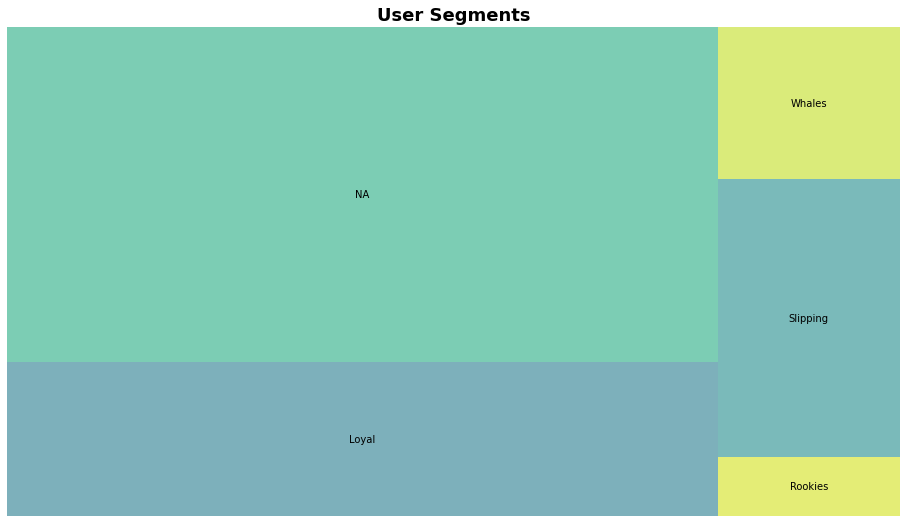

In [21]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes= user_segment_size['RevenueCount'], 
              label= user_segment_size.index, alpha=.6 )
plt.title("User Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

[Text(0, 0, 'NA'),
 Text(1, 0, 'Loyal'),
 Text(2, 0, 'Slipping'),
 Text(3, 0, 'Whales'),
 Text(4, 0, 'Rookies')]

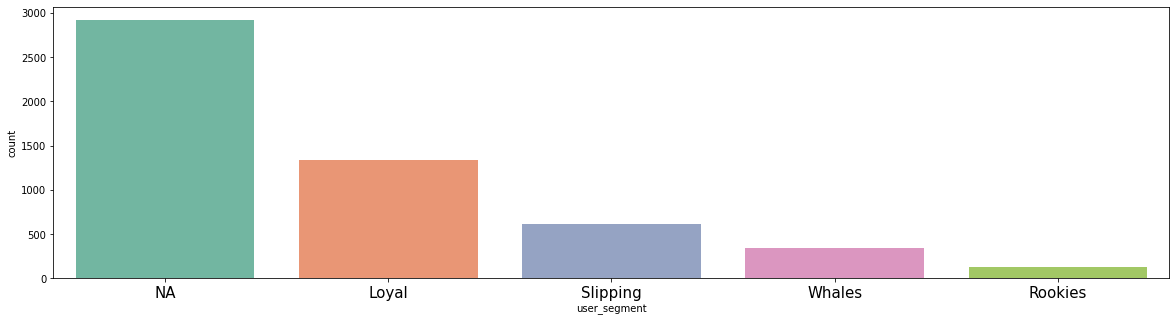

In [22]:

rfm_score_order = dg['user_segment'].value_counts().index

plt.figure(figsize=(20,5))
sns.set_palette("Set2")
ax= sns.countplot(data= dg, x='user_segment', dodge= False, order= rfm_score_order) 
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

* Merging two dataframes

In [23]:
# Merging two dataframes
result_df = dg.merge(full_df, on='CustomerID', how='left')
result_df.head()

,CustomerID,num_days,recency,frequency,num_units,monetary,avg_order_value,profit_margin,CLTV,cust_lifetime_value,...,RFM_segment,user_segment,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,CostPerOrder
0,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,3.03.01.0,Whales,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,United Kingdom,45.0
1,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,3.03.01.0,Whales,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,United Kingdom,22.5
2,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,3.03.01.0,Whales,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,United Kingdom,22.5
3,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,3.03.01.0,Whales,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,United Kingdom,22.5
4,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,3.03.01.0,Whales,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,United Kingdom,1.0


# Add Date Dimensions

In [24]:
def add_date_dim(df, col_name):
    df['year'] = pd.DatetimeIndex(df[col_name]).year
    df['month'] = pd.DatetimeIndex(df[col_name]).month
    df['quarter'] = pd.DatetimeIndex(df[col_name]).quarter
    df['week'] = pd.DatetimeIndex(df[col_name]).week
    df['weekday'] = pd.DatetimeIndex(df[col_name]).weekday
    return df
    
add_date_dim(result_df, 'InvoiceDate')
result_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


,CustomerID,num_days,recency,frequency,num_units,monetary,avg_order_value,profit_margin,CLTV,cust_lifetime_value,...,Quantity,InvoiceDate,Price,Country,CostPerOrder,year,month,quarter,week,weekday
0,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,10,2009-12-14 08:34:00,4.5,United Kingdom,45.0,2009,12,4,51,0
1,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,5,2009-12-14 11:00:00,4.5,United Kingdom,22.5,2009,12,4,51,0
2,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,5,2009-12-14 11:02:00,4.5,United Kingdom,22.5,2009,12,4,51,0
3,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,5,2009-12-18 10:47:00,4.5,United Kingdom,22.5,2009,12,4,51,4
4,12346.0,726,326,34,74285,77556.46,2281.072353,19389.115,1.621910e+07,3.144739e+11,...,1,2009-12-18 10:55:00,1.0,United Kingdom,1.0,2009,12,4,51,4


# BUSINESS GOALS

* **Personalization**:  By creating effective customer segments, you can create relevant, personalized offers.
* **Improve Conversion Rates**: Personalized offers will yield higher conversion rates because your customers are engaging with products they care about. 